# Bayesian Models

1. Bayesian Neural Network
2. Monte Carlo Dropout
3. Deep Ensemble

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

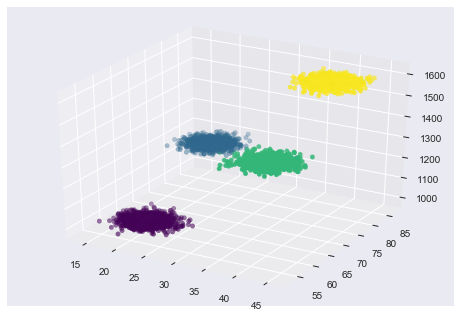

In [2]:
from data.synthetic import get_normal_data, plot_data

X, y = get_normal_data(1000)
plot_data(X, y)

# Variational Bayes

Bayesian Neural Network using Variational Inference

Ref:
* Flipout: Efficient Pseudo-Independent Weight Perturbations on Mini-Batches: https://arxiv.org/abs/1803.04386
* https://medium.com/tensorflow/regression-with-probabilistic-layers-in-tensorflow-probability-e46ff5d37baf
* https://github.com/krasserm/bayesian-machine-learning/blob/master/bayesian_neural_networks.ipynb
* https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/bayesian_neural_network.py

In [73]:
class BayesNN:
    """Bayesian neural network using Flipout estimator"""
    def __init__(self, x_features, y_features, n_hidden=32, n_layers=3):
        self.x_features = x_features
        self.y_features = y_features
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        
        self.optimizer = tf.keras.optimizers.Adam()
        self.loss = lambda y, distr: -distr.log_prob(y)
        self.normal_sp = lambda params: tfd.Normal(
            loc=params[:,0:1],
            scale=1e-3+tf.math.softplus(0.05*params[:,1:2]))
        self.bias_posterior_fn = tfp.layers.util.default_mean_field_normal_fn()
        self.bias_prior_fn = tfp.layers.default_multivariate_normal_fn
        self.kernel_divergence_fn = kernel_divergence_fn
        self.bias_divergence_fn = bias_divergence_fn
        
        self.build_model()
        
    def build_model(self):
        self.model = tf.keras.Sequential([])
        for _ in range(self.n_layers):
            self.model.add(
                tfp.layers.DenseFlipout(16,
                    bias_posterior_fn=self.bias_posterior_fn,
                    bias_prior_fn=self.bias_prior_fn,
                    kernel_divergence_fn=self.kernel_divergence_fn,
                    bias_divergence_fn=self.bias_divergence_fn,
                    activation="relu"))
        self.model.add(tfp.layers.DistributionLambda(self.normal_sp))
        self.model.compile(self.optimizer, self.loss)
    
    def fit(self, X, y, epochs=1000, batch_size=32, verbose=1):
        return self.model.fit(X, y,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=verbose)
    
    def sample(self, X):
        return self.model.predict(X)

In [74]:
bnn = BayesNN(x_features=2, y_features=1, n_hidden=32, n_layers=3)
bnn.fit(X, y, epochs=1000)
y_hat = bnn.sample(X)

Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 783143.5625
Epoch 2/1000
125/125 [==============================] - 0s 2ms/step - loss: 52865.3203
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 16348.3652
Epoch 4/1000
125/125 [==============================] - 0s 2ms/step - loss: 8626.3809
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 5383.0059
Epoch 6/1000
125/125 [==============================] - 0s 1ms/step - loss: 3699.1235
Epoch 7/1000
125/125 [==============================] - 0s 2ms/step - loss: 2643.3545
Epoch 8/1000
125/125 [==============================] - 0s 2ms/step - loss: 1968.9966
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 1488.5714
Epoch 10/1000
125/125 [==============================] - 0s 2ms/step - loss: 1137.6903
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 872.8494
Epoch 12/1000
125/125 [==========================

125/125 [==============================] - 0s 1ms/step - loss: 6.5393
Epoch 98/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.4297
Epoch 99/1000
125/125 [==============================] - 0s 2ms/step - loss: 6.4495
Epoch 100/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.3771
Epoch 101/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.3329
Epoch 102/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.3146
Epoch 103/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.2162
Epoch 104/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.2138
Epoch 105/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1289
Epoch 106/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.0886
Epoch 107/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.0540
Epoch 108/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.07

125/125 [==============================] - 0s 1ms/step - loss: 5.4653
Epoch 194/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.4583
Epoch 195/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4597
Epoch 196/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4633
Epoch 197/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.4650
Epoch 198/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.4644
Epoch 199/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4544
Epoch 200/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4545
Epoch 201/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4537
Epoch 202/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.4491
Epoch 203/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.4536
Epoch 204/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.

125/125 [==============================] - 0s 1ms/step - loss: 5.3510
Epoch 290/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3570
Epoch 291/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3479
Epoch 292/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3535
Epoch 293/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3449
Epoch 294/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3498
Epoch 295/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3478
Epoch 296/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3413
Epoch 297/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3440
Epoch 298/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3333
Epoch 299/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.3390
Epoch 300/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.

125/125 [==============================] - 0s 1ms/step - loss: 5.2752
Epoch 386/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2787
Epoch 387/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.2748
Epoch 388/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2749
Epoch 389/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2777
Epoch 390/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2659
Epoch 391/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2715
Epoch 392/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2704
Epoch 393/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2734
Epoch 394/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2730
Epoch 395/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2721
Epoch 396/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.

125/125 [==============================] - 0s 1ms/step - loss: 5.2030
Epoch 482/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2099
Epoch 483/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2035
Epoch 484/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2029
Epoch 485/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.2017
Epoch 486/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2005
Epoch 487/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1933
Epoch 488/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2074
Epoch 489/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.2054
Epoch 490/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1948
Epoch 491/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1970
Epoch 492/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.

125/125 [==============================] - 0s 1ms/step - loss: 5.1370
Epoch 578/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1406
Epoch 579/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1385
Epoch 580/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1415
Epoch 581/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1381
Epoch 582/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1424
Epoch 583/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1376
Epoch 584/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1438
Epoch 585/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1397
Epoch 586/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1354
Epoch 587/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1399
Epoch 588/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.

125/125 [==============================] - 0s 1ms/step - loss: 5.1159
Epoch 674/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1209
Epoch 675/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1200
Epoch 676/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1197
Epoch 677/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1210
Epoch 678/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1246
Epoch 679/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1090
Epoch 680/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1163
Epoch 681/1000
125/125 [==============================] - ETA: 0s - loss: 5.118 - 0s 1ms/step - loss: 5.1156
Epoch 682/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1120
Epoch 683/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1126
Epoch 684/1000
125/125 [==============================] 

125/125 [==============================] - 0s 1ms/step - loss: 5.1037
Epoch 769/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1084
Epoch 770/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1075
Epoch 771/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0990
Epoch 772/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0970
Epoch 773/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.1007
Epoch 774/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1046
Epoch 775/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0976
Epoch 776/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1022
Epoch 777/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1056
Epoch 778/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.1003
Epoch 779/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.

Epoch 864/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0896
Epoch 865/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0895
Epoch 866/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0946
Epoch 867/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.0939
Epoch 868/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0948
Epoch 869/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0890
Epoch 870/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0875
Epoch 871/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0928
Epoch 872/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0928
Epoch 873/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0859
Epoch 874/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0945
Epoch 875/1000
125/125 [==============================] - 0s 2ms/

125/125 [==============================] - 0s 2ms/step - loss: 5.0789
Epoch 960/1000
125/125 [==============================] - ETA: 0s - loss: 5.087 - 0s 1ms/step - loss: 5.0769
Epoch 961/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0908
Epoch 962/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0809
Epoch 963/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0793
Epoch 964/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0765
Epoch 965/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0764
Epoch 966/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.0819
Epoch 967/1000
125/125 [==============================] - 0s 2ms/step - loss: 5.0748
Epoch 968/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0771
Epoch 969/1000
125/125 [==============================] - 0s 1ms/step - loss: 5.0791
Epoch 970/1000
125/125 [==============================] 

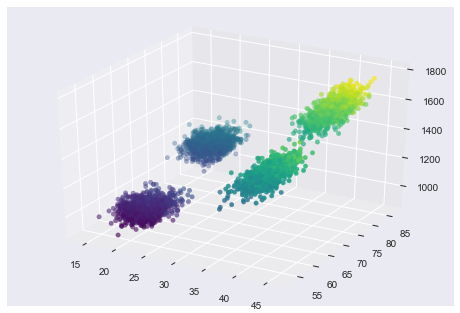

In [75]:
plot_data(X, y_hat)

# Monte Carlo Dropout

Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning: https://arxiv.org/abs/1506.02142

Dropout is commonly used to prevent deep learning models from overfitting, by randomly zeroing-out activations during training and scale activations by p during testing. Dropout with some modifications is useful for estimating uncertainty of the model during prediction. Monte Carlo Dropout combines predictions of multiple forward passes of the same data point X through the network while applying different dropout masks. MC Dropout applies dropout both during training and testing.

1. Train a neural network f_θ(x) containing Dropout layers and an appropriate probabilistic loss.
2. During testing, perform T stochastic forward passes through f_θ(x) to obtain predictions for input x.
3. Combine predictions to obtain an expectation-based prediction and uncertainty estimate.

Ref:
* https://everyhue.me/posts/why-uncertainty-matters/
* https://github.com/huyng/incertae/blob/master/mcdrop_regression.ipynb

In [37]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Sequential


class MCDropout:
    def __init__(self, x_features, y_features, n_hidden=20, dropout=0.5):
        self.x_features = x_features
        self.y_features = y_features
        self.n_hidden = n_hidden
        self.dropout = dropout
        self.model = self.build_model()
    
    def build_model(self):
        model = Sequential([
            Dense(self.n_hidden, activation='relu'),
            Dense(self.n_hidden, activation='tanh'),
            Dropout(self.dropout),
            Dense(self.y_features + 1, activation=None),
        ])
        optimizer = tf.keras.optimizers.Adam()
        model.compile(loss=self.loss, optimizer=optimizer)
        return model
    
    def loss(self, y_true, y_pred):
        """Gaussian negative log likelihood.
            -log p(y|x) = log(sigma^2)/2 + (y-mu)^2/2sigma^2
        Model predits log(sigma^2) rather than sigma^2 for stability."""
        y_true = tf.reshape(y_true, [-1])
        mu = y_pred[:, :-1]
        si = y_pred[:, -1][:,np.newaxis]
        loss = (si + tf.square(y_true - mu)/tf.math.exp(si)) / 2.0
        return tf.reduce_mean(loss)
    
    def fit(self, X, y, epochs=1000, verbose=1):
        self.model.fit(X, y, batch_size=32, epochs=epochs, verbose=verbose)
        
    def predict(self, X, T=20):
        """Perform T stochastic forward passes."""
        mus, sigmas = [], []
        for t in range(T):
            print(f"Performing forward pass {t}/{T}")
            y_hat = self.model(X, training=True)
            mu, sigma = y_hat[:,:-1], y_hat[:,-1][:, np.newaxis]
            mus.append(mu)
            sigmas.append(sigma)
        
        mus = np.array(mus)
        sigmas = np.array(sigmas)
        variances = np.exp(sigmas)
        
        y_mean = np.mean(mus, axis=0)
        y_std = np.sqrt(np.mean(variances + mus**2, axis=0) - y_mean**2)
        return y_mean, y_std

In [38]:
mcdropout = MCDropout(X.shape[1], y.shape[1], n_hidden=32, dropout=0.3)
mcdropout.fit(X, y, epochs=1000)
y_mean, y_std = mcdropout.predict(X, T=20)

Epoch 1/1000
125/125 [==============================] - 0s 1ms/step - loss: 52308.0703
Epoch 2/1000
125/125 [==============================] - 0s 1ms/step - loss: 3488.1506
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 2738.7766
Epoch 4/1000
125/125 [==============================] - 0s 1ms/step - loss: 2294.2485
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 1934.3713
Epoch 6/1000
125/125 [==============================] - 0s 1ms/step - loss: 1590.3683
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 1303.0868
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 1170.5372
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 989.3684
Epoch 10/1000
125/125 [==============================] - 0s 1ms/step - loss: 894.7354
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 748.4326
Epoch 12/1000
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 9.3789
Epoch 98/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.3300
Epoch 99/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.3142A: 0s - loss: 9.403
Epoch 100/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.9674
Epoch 101/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.0054
Epoch 102/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.0358
Epoch 103/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.2542
Epoch 104/1000
125/125 [==============================] - 0s 1ms/step - loss: 9.2732
Epoch 105/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.9241
Epoch 106/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.9928
Epoch 107/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.9345
Epoch 108/1000
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 8.4033
Epoch 194/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.4112
Epoch 195/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3433
Epoch 196/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.2998
Epoch 197/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3477
Epoch 198/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3463
Epoch 199/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3840
Epoch 200/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.2678
Epoch 201/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3064
Epoch 202/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.2693
Epoch 203/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.3021
Epoch 204/1000
125/125 [==============================] - 0s 1ms/step - loss: 8.

125/125 [==============================] - 0s 1ms/step - loss: 7.6980
Epoch 290/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6913
Epoch 291/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6952
Epoch 292/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6795
Epoch 293/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.7140
Epoch 294/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6756
Epoch 295/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6610
Epoch 296/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6690
Epoch 297/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6621
Epoch 298/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6245
Epoch 299/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.6141
Epoch 300/1000
125/125 [==============================] - 0s 1ms/step - loss: 7.

125/125 [==============================] - 0s 1ms/step - loss: 6.9141
Epoch 386/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.9040A: 0s - loss: 6.904
Epoch 387/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8949
Epoch 388/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8927
Epoch 389/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8759
Epoch 390/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8651
Epoch 391/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8606
Epoch 392/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8465
Epoch 393/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8368
Epoch 394/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8376
Epoch 395/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.8223
Epoch 396/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 1ms/step - loss: 6.1233
Epoch 482/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1139
Epoch 483/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1097
Epoch 484/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1085
Epoch 485/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1020
Epoch 486/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1016
Epoch 487/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.0973
Epoch 488/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1032
Epoch 489/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.1001
Epoch 490/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.0966
Epoch 491/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.0943
Epoch 492/1000
125/125 [==============================] - 0s 1ms/step - loss: 6.

KeyboardInterrupt: 

In [ ]:
y_mean, y_std = mcdropout.predict(X, T=20)
plot_data(X, y_mean)
plot_data(X, y_std)

# Deep Ensemble

Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles: https://arxiv.org/abs/1612.01474

Deep Ensembles use M trained models initialised from random starting points to collect Monte Carlo samples.

Ref:
* https://github.com/huyng/incertae/blob/master/ensemble_regression.ipynb

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Sequential


class DeepEnsemble:
    def __init__(self, x_features, y_features, n_models=5, n_hidden=20, dropout=0.5):
        self.x_features = x_features
        self.y_features = y_features
        self.n_models = n_models
        self.n_hidden = n_hidden
        self.dropout = dropout
        self.models = [self.build_model() for _ in range(n_models)]
    
    def build_model(self):
        model = Sequential([
            Dense(self.n_hidden, activation='relu'),
            Dense(self.n_hidden, activation='tanh'),
            Dropout(self.dropout),
            Dense(self.y_features + 1, activation=None),
        ])
        optimizer = tf.keras.optimizers.Adam(0.001)
        model.compile(loss=self.loss, optimizer=optimizer)
        return model
    
    def loss(self, y_true, y_pred):
        """Gaussian negative log likelihood.
            -log p(y|x) = log(sigma^2)/2 + (y-mu)^2/2sigma^2
        Model predits log(sigma^2) rather than sigma^2 for stability."""
        
        y_true = tf.reshape(y_true, [-1])
        mu = y_pred[:, :-1]
        si = y_pred[:, -1][:,np.newaxis]
        loss = (si + tf.square(y_true - mu)/tf.math.exp(si)) / 2.0
        return tf.reduce_mean(loss)
    
    def fit(self, X, y, epochs=100, verbose=1):
        for i in range(len(self.models)):
            print(f"Training model {i}/{len(self.models)}")
            self.models[i].fit(X, y, batch_size=32, epochs=epochs, verbose=verbose)
        
    def predict(self, X):
        """Perform T stochastic forward passes."""
        
        mus, sigmas = [], []
        for model in self.models:
            y_hat = model(X)
            mu, sigma = y_hat[:,:-1], y_hat[:,-1][:, np.newaxis]
            mus.append(mu)
            sigmas.append(sigma)
            
        mus = np.array(mus)
        sigmas = np.array(sigmas)
        variances = np.exp(sigmas)
        
        y_mean = np.mean(mus, axis=0)
        y_variance = np.mean(variances + mus**2, axis=0) - y_mean**2
        y_std = np.sqrt(y_variance)
        return y_mean, y_std

In [ ]:
deepensem = DeepEnsemble(X.shape[1], y.shape[1], n_models=5, n_hidden=32, dropout=0.3)
deepensem.fit(X, y, epochs=1000)
y_mean, y_std = deepensem.predict(X)

In [ ]:
plot_data(X, y_mean)
plot_data(X, y_std)